# Data Project 3 | Grupo 3

## Predicción del riesgo crediticio

In [ ]:
#Librerias
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#Cambiar ruta a github al acabar el proyecto: url = 'copied_raw_GH_link'
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ruta Diego 
# path_dem = "/content/drive/MyDrive/MDA/DataProject3/demograficos_diego.csv"
# path_prev = "/content/drive/MyDrive/MDA/DataProject3/previous_loan_diego.csv"

# ruta Enrique
# path_dem = "/content/demograficos_diego.csv"
# path_prev = "/content/previous_loan_diego.csv"

# ruta Alfonso
path_dem = "/content/demograficos_diego.csv"
path_prev = "/content/previous_loan_diego.csv"


In [ ]:
dem = pd.read_csv(path_dem)
prev = pd.read_csv(path_prev)

In [ ]:
prev

,Unnamed: 0,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,diff_approv_closed_date,Good_bad_flag,num_prest
0,0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14 00:00:00,2016-09-01 15:51:43,16,Good,11
1,1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30 00:00:00,2017-05-26 00:00:00,29,Good,11
2,2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04 00:00:00,2017-04-26 22:03:47,52,Bad,11
3,3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24 00:00:00,2017-04-24 00:48:43,14,Good,6
4,4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03 00:00:00,2017-07-14 21:08:35,27,Bad,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34,2016-04-16 12:36:28,10000.0,13000.0,30,2016-05-14 00:04:52,NaN,2016-05-16 00:00:00,2016-05-13 18:05:07,27,Good,13
18179,18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07,2016-11-18 13:25:51,30000.0,34400.0,30,2016-12-13 16:08:57,NaN,2016-12-19 00:00:00,2016-12-13 15:53:48,25,Good,13
18180,18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56,2016-06-12 14:30:50,10000.0,13000.0,30,2016-07-09 15:39:00,NaN,2016-07-12 00:00:00,2016-07-09 15:23:56,27,Good,13
18181,18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45,2016-08-27 19:03:34,10000.0,13000.0,30,2016-10-15 10:17:54,NaN,2016-09-26 00:00:00,2016-10-15 10:02:45,48,Bad,1


## 00_Descripción de los Datasets

### dataset: "train_previous_loan"

In [ ]:
#CUSTOMERID - SYSTEMLOANID - Identificadores de clientes y préstamos
prev.describe()

,Unnamed: 0,systemloanid,loannumber,loanamount,totaldue,termdays,diff_approv_closed_date,num_prest
count,18183.000000,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000,18183.00000,18183.000000
mean,9091.000000,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790,23.38041,7.372876
std,5249.124308,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556,13.25201,4.282959
min,0.000000,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000,0.00000,1.000000
25%,4545.500000,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000,14.00000,4.000000
50%,9091.000000,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000,25.00000,7.000000
75%,13636.500000,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000,29.00000,10.000000
max,18182.000000,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000,380.00000,26.000000


In [ ]:
#CUSTOMERID - SYSTEMLOANID - Identificadores de clientes y préstamos
prev.dtypes

Unnamed: 0                   int64
customerid                  object
systemloanid                 int64
loannumber                   int64
approveddate                object
creationdate                object
loanamount                 float64
totaldue                   float64
termdays                     int64
closeddate                  object
referredby                  object
firstduedate                object
firstrepaiddate             object
diff_approv_closed_date      int64
Good_bad_flag               object
num_prest                    int64
dtype: object

Variables cuantitativas

In [ ]:
# Only the variable "referredby" has missing values = 17.157 sobre 18.183 del total de datos
prev.isna().sum()

Unnamed: 0                     0
customerid                     0
systemloanid                   0
loannumber                     0
approveddate                   0
creationdate                   0
loanamount                     0
totaldue                       0
termdays                       0
closeddate                     0
referredby                 17157
firstduedate                   0
firstrepaiddate                0
diff_approv_closed_date        0
Good_bad_flag                  0
num_prest                      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


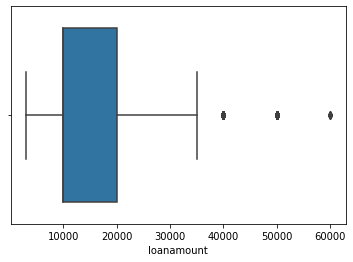

In [ ]:
# LOANAMOUNT - Cantidad pedida en el préstamo
prev.loanamount.describe()
sns.boxplot(prev["loanamount"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


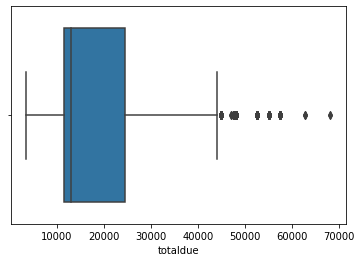

In [ ]:
# TOTALDUE - Cantidad total requerida para liquidar el préstamo; este es el valor del préstamo
# de capital desembolsado + intereses e impuestos
prev.totaldue.describe()
sns.boxplot(prev["totaldue"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


30    11045
15     6115
60      993
90       30
Name: termdays, dtype: int64

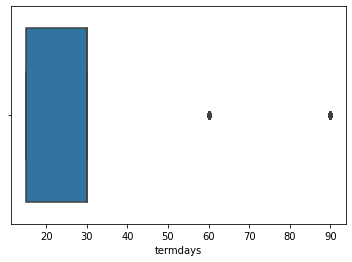

In [ ]:
# TERMDAYS - Plazo del préstamo
prev.termdays.describe()
sns.boxplot(prev["termdays"])
prev["termdays"].value_counts()

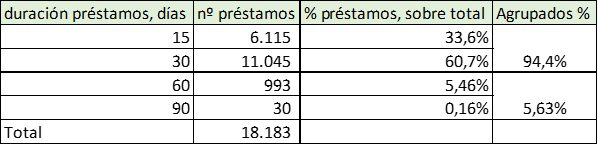

Los préstamos de 90 días apenas suponen un 0,16% del total de los prestamos del dataset. Los de 60 días representan un 5,46% del total.

Variables cualitativas

In [ ]:
#APPROVEDDATE - Fecha en la que se aprobó el préstamo
prev.approveddate.describe()

count                   18183
unique                  18172
top       2017-04-20 14:00:44
freq                        2
Name: approveddate, dtype: object

In [ ]:
#CREATIONDATE - Fecha en que se creó la solicitud del préstamo
prev.creationdate.describe()

count                   18183
unique                  18173
top       2017-06-12 10:38:36
freq                        2
Name: creationdate, dtype: object

In [ ]:
#CLOSEDDATE - Fecha en la cual se liquidó el préstamo
prev.closeddate.describe()

count                   18183
unique                  17955
top       2016-11-07 00:53:42
freq                        5
Name: closeddate, dtype: object

In [ ]:
#FIRSTDUEDATE - Fecha del primer pago en caso de que el plazo sea superior a 30 días.
#En el caso de que el plazo sea de más de 60 días, se deben realizar varios pagos mensuales,
#y esta fecha refleja la fecha del primer pago
prev.firstduedate.describe()

count                   18183
unique                    363
top       2017-07-03 00:00:00
freq                      398
Name: firstduedate, dtype: object

In [ ]:
#FIRSTREPAIDDATE - Fecha real en la que se hizo el primer pago
prev.firstrepaiddate.describe()

count                   18183
unique                  18011
top       2016-08-04 00:00:00
freq                        7
Name: firstrepaiddate, dtype: object

In [ ]:
#LOAN NUMBER - Categorías del préstamo:
prev.loannumber.describe()
prev["loannumber"].value_counts()

1     4344
2     2969
3     2300
4     1860
5     1535
6     1288
7     1036
8      817
9      637
10     446
11     333
12     223
13     146
14      96
15      54
16      33
17      19
18      16
19      10
20       8
21       7
22       2
24       1
23       1
25       1
26       1
Name: loannumber, dtype: int64

A REVISAR: esta variable quiere decir la cantidad de préstamos que ha pedido un usuario ¿? Por ejemplo, hay 4 usuarios que han pedido 24, 25, 23 y 26 préstamos. Hay 446 usuarios que han pedido 10 préstamos. ¿?

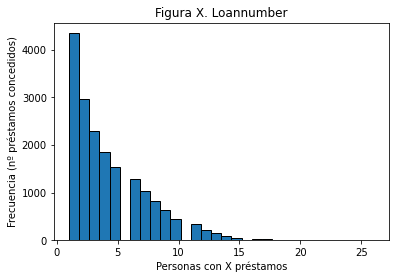

In [ ]:
plt.hist(prev.loannumber, edgecolor='black', bins=30)
plt.title('Figura X. Loannumber')
plt.ylabel('Frecuencia (nº préstamos concedidos)')
plt.xlabel('Personas con X préstamos')
plt.show()

### dataset: "train_demograficos"

In [ ]:
#CUSTOMERID - TRAIN datos demográficos
dem.describe()

,Unnamed: 0,longitude_gps,latitude_gps
count,4346.000000,4346.000000,4346.000000
mean,2172.500000,4.626189,7.251356
std,1254.726464,7.184832,3.055052
min,0.000000,-118.247009,-33.868818
25%,1086.250000,3.354953,6.470610
50%,2172.500000,3.593302,6.621888
75%,3258.750000,6.545220,7.425052
max,4345.000000,151.209290,71.228069


In [ ]:
#CUSTOMERID - TRAIN datos demográficos
dem.dtypes

Unnamed: 0                      int64
customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
Country                        object
city                           object
dtype: object

In [ ]:
#Missing values sobre 4346 del total de los datos
dem.isna().sum()

Unnamed: 0                       0
customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
Country                          0
city                          3070
dtype: int64

In [ ]:
#BIRTHDATE - Fecha de nacimiento del cliente
dem.birthdate.describe()

count           4346
unique          3297
top       1983-10-19
freq               5
Name: birthdate, dtype: object

In [ ]:
#BIRTHDATE - Fecha de nacimiento del cliente
dem.birthdate.describe()
dem["birthdate"].value_counts()

1983-10-19    5
1986-07-04    5
1984-06-28    5
1983-12-16    5
1980-09-22    4
             ..
1990-09-25    1
1982-03-05    1
1980-01-28    1
1993-09-23    1
1989-09-26    1
Name: birthdate, Length: 3297, dtype: int64

In [ ]:
#BANK_ACCOUNT_TYPE - Tipo de cuenta bancaria
dem.bank_account_type.describe()

count        4346
unique          3
top       Savings
freq         3425
Name: bank_account_type, dtype: object

In [ ]:
#BANK_ACCOUNT_TYPE - Tipo de cuenta bancaria

dem["bank_account_type"].value_counts()

Savings    3425
Other       865
Current      56
Name: bank_account_type, dtype: int64

In [ ]:
#BANK_NAME_CLIENTS - Nombre del banco
dem.bank_name_clients.describe()
dem["bank_name_clients"].value_counts()

GT Bank               1598
First Bank             590
Access Bank            432
UBA                    353
Zenith Bank            301
Diamond Bank           282
EcoBank                150
Stanbic IBTC           145
FCMB                   121
Fidelity Bank          103
Skye Bank              102
Sterling Bank           55
Wema Bank               28
Union Bank              23
Heritage Bank           22
Keystone Bank           19
Standard Chartered      15
Unity Bank               7
Name: bank_name_clients, dtype: int64

In [ ]:
#BANK_BRANCH_CLIENTS - Localización del Banco
dem.bank_branch_clients.describe()
dem["bank_branch_clients"].value_counts()

OGBA                                                              3
HEAD OFFICE                                                       2
AJOSE ADEOGUN                                                     2
OREGUN                                                            2
APAPA                                                             2
AKOWONJO                                                          1
47 LAGOS ROAD, IKORODU                                            1
OAU ILE IFE                                                       1
RING ROAD                                                         1
PLOT 999C DANMOLE STREET, ADEOLA ODEKU, VICTORIA ISLAND, LAGOS    1
HERITAGE BANK, DUGBE, IBADAN                                      1
ADEOLA HOPEWELL                                                   1
WHARF ROAD, APAPA                                                 1
ILUPEJU                                                           1
LAGOS                                           

In [ ]:
#EMPLOYMENT_STATUS_CLIENTS - Tipo de empleo del cliente
dem.employment_status_clients.describe()
dem.employment_status_clients.value_counts()

Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

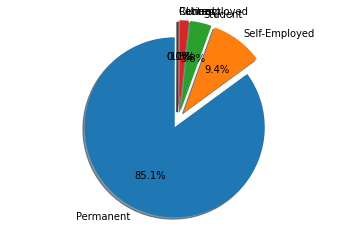

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = dem.employment_status_clients.unique()
labels = 'Permanent', 'Self-Employed', 'Student', 'Unemployed', 'Retired', 'Contract'
sizes = dem.employment_status_clients.value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Arreglar los textos del gráfico

In [ ]:
#LEVEL_OF_EDUCATION_CLIENTs - Nivel de estudios del cliente
dem.level_of_education_clients.describe()
dem["level_of_education_clients"].value_counts()

Graduate         420
Secondary         89
Post-Graduate     68
Primary           10
Name: level_of_education_clients, dtype: int64

## 01_Procesamiento

### *train_previous_loan*

In [ ]:
#Convertir los campos que contengan fechas a formato "Date_Time"
prev[["approveddate","creationdate","closeddate","firstduedate","firstrepaiddate"]] = prev[["approveddate",
                                                                                             "creationdate",
                                                                                             "closeddate",
                                                                                             "firstduedate",
                                                                                             "firstrepaiddate"]].apply(pd.to_datetime)

#### Creación nuevas variables

A partir de las variables de este dataset, decidimos crear las siguientes:


*   "num_prest" = número de préstamos por cliente
*   "tipo_int" = tipo de interés de cada préstamo
*   "diff_approv_closed_date" = duración en días que tardó el cliente en devolver el préstamo
*   "Good_bad_flag" = variable target - indica si el cliente pago su deuda dentro del plazo establecido

In [ ]:
#Número de préstamos por cliente:
prev["num_prest"] = prev.groupby("customerid")["systemloanid"].transform("size")    
prev.num_prest.describe()

count    18183.000000
mean         7.372876
std          4.282959
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         26.000000
Name: num_prest, dtype: float64

In [ ]:
#Tipo de interés del préstamo:
prev["tipo_int"] = ((prev["totaldue"] - prev["loanamount"])/prev["loanamount"])
prev.tipo_int.describe()

count    18183.000000
mean         0.203706
std          0.074354
min          0.000000
25%          0.150000
50%          0.190000
75%          0.300000
max          0.300000
Name: tipo_int, dtype: float64

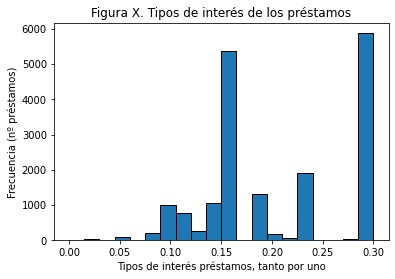

In [ ]:
plt.hist(prev.tipo_int, edgecolor='black', bins=20)
plt.title('Figura X. Tipos de interés de los préstamos')
plt.ylabel('Frecuencia (nº préstamos)')
plt.xlabel('Tipos de interés préstamos, tanto por uno')
plt.show()

In [ ]:
#Restar la fecha de liquidación del préstamo por la fecha de aprobación para obtener los días que tardó el cliente en pagar la totalidad de la deuda:
prev["diff_approv_closed_date"] = (prev["closeddate"] - prev["approveddate"]).dt.days
prev.diff_approv_closed_date.describe()

count    18183.00000
mean        23.38041
std         13.25201
min          0.00000
25%         14.00000
50%         25.00000
75%         29.00000
max        380.00000
Name: diff_approv_closed_date, dtype: float64

Creamos la variable target "Good_bad_flag": 
- si el plazo del préstamo es superior o igual al tiempo que tardó el cliente en pagar = "Good"
- si el plazo del préstamo es inferior al tiempo que tardó el cliente en pagar = "Bad"


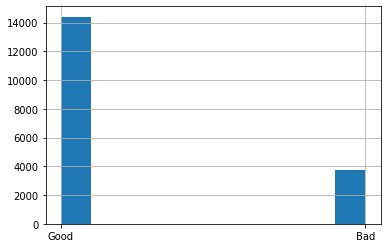

In [ ]:
prev.loc[prev["termdays"] >= prev["diff_approv_closed_date"], "Good_bad_flag"] = "Good"            
prev.loc[prev["termdays"] < prev["diff_approv_closed_date"], "Good_bad_flag"] = "Bad"   

prev.Good_bad_flag.hist()

#### Missing values

Solo la variable "Referredby" tiene valores nulos. Decidimos recodificarla como variable categórica, en la que los "customer_id" relacionados tendrán el valor 1, y los valores vacíos 0.

In [ ]:
prev.isna().sum()

Unnamed: 0                     0
customerid                     0
systemloanid                   0
loannumber                     0
approveddate                   0
creationdate                   0
loanamount                     0
totaldue                       0
termdays                       0
closeddate                     0
referredby                 17157
firstduedate                   0
firstrepaiddate                0
diff_approv_closed_date        0
Good_bad_flag                  0
num_prest                      0
tipo_int                       0
dtype: int64

In [ ]:
#Referredby = nan to 0 and customerid to 1
prev["referredby"] = prev["referredby"].fillna(0)
prev["referredby"] = prev["referredby"].apply(lambda x: 1 if x!=0 else 0)
prev["referredby"].value_counts()

0    17157
1     1026
Name: referredby, dtype: int64

In [ ]:
prev

,Unnamed: 0,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,diff_approv_closed_date,Good_bad_flag,num_prest,tipo_int
0,0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,0,2016-09-14,2016-09-01 15:51:43,16,Good,11,0.300000
1,1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,0,2017-05-30,2017-05-26 00:00:00,29,Good,11,0.300000
2,2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,0,2017-04-04,2017-04-26 22:03:47,52,Bad,11,0.190000
3,3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,0,2017-04-24,2017-04-24 00:48:43,14,Good,6,0.150000
4,4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,0,2017-07-03,2017-07-14 21:08:35,27,Bad,2,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34,2016-04-16 12:36:28,10000.0,13000.0,30,2016-05-14 00:04:52,0,2016-05-16,2016-05-13 18:05:07,27,Good,13,0.300000
18179,18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07,2016-11-18 13:25:51,30000.0,34400.0,30,2016-12-13 16:08:57,0,2016-12-19,2016-12-13 15:53:48,25,Good,13,0.146667
18180,18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56,2016-06-12 14:30:50,10000.0,13000.0,30,2016-07-09 15:39:00,0,2016-07-12,2016-07-09 15:23:56,27,Good,13,0.300000
18181,18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45,2016-08-27 19:03:34,10000.0,13000.0,30,2016-10-15 10:17:54,0,2016-09-26,2016-10-15 10:02:45,48,Bad,1,0.300000


### *train_demograficos*

In [ ]:
#Convertir los campos que contengan fechas a formato "Date_Time":
dem[["birthdate"]] = dem[["birthdate"]].apply(pd.to_datetime)
#Coordenadas a Float
dem[["longitude_gps", "latitude_gps"]] = dem[["longitude_gps", "latitude_gps"]].astype(float)

#### Creación nuevas variables

A partir de las variables de este dataset, decidimos crear las siguientes variables:


*   "age" - edad del cliente
*   "country" - país desde el cual se realiza la operación
*   "city" - ciudad desde la cual se realiza la operación 

In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
dem["age"] = dem["birthdate"].apply(lambda x : (pd.datetime.now().year - x.year))
dem["age"] = dem["age"] - 4

dem.age.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


count    4346.000000
mean       33.946618
std         6.135591
min        22.000000
25%        30.000000
50%        33.000000
75%        38.000000
max        57.000000
Name: age, dtype: float64

In [ ]:
# FUNCION PAIS + CIUDAD (no la pongo porque tarda 25 min en ejecutarse)

#### Missing values


Observamos que las variables "bank_branch_clients"; "level_of_education_clients" ; "employment_status_clients" ; "city", contienen missing values. 

Borraremos las columnas innecesarias despúes de juntar ambos datasets

In [ ]:
dem.isna().sum()

Unnamed: 0                       0
customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
Country                          0
city                          3070
age                              0
dtype: int64

### Join datasets

In [ ]:
# LEFT JOIN
prev_dem = pd.merge(prev, dem, left_on='customerid', right_on='customerid')

In [ ]:
prev_dem.isna().sum()

Unnamed: 0_x                      0
customerid                        0
systemloanid                      0
loannumber                        0
approveddate                      0
creationdate                      0
loanamount                        0
totaldue                          0
termdays                          0
closeddate                        0
referredby                        0
firstduedate                      0
firstrepaiddate                   0
diff_approv_closed_date           0
Good_bad_flag                     0
num_prest                         0
tipo_int                          0
Unnamed: 0_y                      0
birthdate                         0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
bank_branch_clients           13589
employment_status_clients      1363
level_of_education_clients    10229
Country                           0
city                        

### Eliminar variables

Eliminamos las variables:

*   "Customer_id"
*   "Systemloanid"

*   Fechas - no incluibles en el modelo, pero se han empleado para crear otras variables contínuas con info relevante
*   "approveddate"
*   "creationdate"
*   "closeddate"
*   "firstduedate"
*   "firstrepaiddate"

*   "Longitude_gps" - sustituida por variable "country"
*   "Latitude_gps" - sustituida por variable "country"
*   "city" - por número de missing values
*   "level_of_education_clients" - por número de missing values
*   "bank branch clients" - por número de missing values
*   "employment_status client" - por número de missing values y porque la mayoría de valores es "Permanent"







In [ ]:
#variables originarias de previous_loan:
prev_dem.drop(["customerid", "systemloanid", "approveddate", "creationdate",
               "closeddate", "firstduedate", "firstrepaiddate", "loannumber", "Unnamed: 0_x"], axis=1, inplace=True)
#variables originarias de demograficos:
prev_dem.drop(["birthdate", "longitude_gps", "latitude_gps", "bank_branch_clients", "city", "Unnamed: 0_y",
               "level_of_education_clients", "employment_status_clients"], axis=1, inplace=True)

In [ ]:
prev_dem

,loanamount,totaldue,termdays,referredby,diff_approv_closed_date,Good_bad_flag,num_prest,tipo_int,bank_account_type,bank_name_clients,Country,age
0,10000.0,13000.0,30,0,16,Good,11,0.300,Other,Diamond Bank,Nigeria,46
1,10000.0,13000.0,30,0,29,Good,11,0.300,Other,Diamond Bank,Nigeria,46
2,20000.0,23800.0,30,0,52,Bad,11,0.190,Other,Diamond Bank,Nigeria,46
3,20000.0,24500.0,30,0,24,Good,11,0.225,Other,Diamond Bank,Nigeria,46
4,20000.0,24500.0,30,0,26,Good,11,0.225,Other,Diamond Bank,Nigeria,46
...,...,...,...,...,...,...,...,...,...,...,...,...
13688,10000.0,11500.0,15,0,2,Good,1,0.150,Savings,UBA,Nigeria,32
13689,10000.0,13000.0,30,1,27,Good,1,0.300,Savings,FCMB,Nigeria,39
13690,10000.0,11500.0,15,0,9,Good,1,0.150,Savings,Zenith Bank,Nigeria,29
13691,10000.0,11500.0,15,0,6,Good,1,0.150,Savings,Access Bank,Nigeria,38


### Outliers

In [ ]:
outl = prev_dem.describe(percentiles=[.25, .5, .75, .90, .95, .99])
outl

,loanamount,totaldue,termdays,referredby,diff_approv_closed_date,num_prest,tipo_int,age
count,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000
mean,16566.347769,19646.612269,26.742131,0.058570,23.430512,7.396699,0.203518,33.860951
std,9375.687619,10512.238823,10.997624,0.234827,13.269178,4.318254,0.074303,6.121597
min,3000.000000,3900.000000,15.000000,0.000000,0.000000,1.000000,0.000000,22.000000
25%,10000.000000,11500.000000,15.000000,0.000000,14.000000,4.000000,0.150000,30.000000
50%,10000.000000,13000.000000,30.000000,0.000000,25.000000,7.000000,0.190000,33.000000
75%,20000.000000,24500.000000,30.000000,0.000000,29.000000,10.000000,0.300000,38.000000
90%,30000.000000,34500.000000,30.000000,0.000000,34.000000,13.000000,0.300000,42.000000
95%,40000.000000,44000.000000,60.000000,1.000000,44.000000,14.000000,0.300000,45.000000
99%,40000.000000,48000.000000,60.000000,1.000000,62.000000,19.000000,0.300000,52.000000


Comprobamos que el 1% de los valores máximos de las variables númericas representan outliers. Decidimos eliminarlos para que nuestro futuro modelo no tienda al overfitting.

In [ ]:
#MODIFY
outlier_variable='loanamount'
threshold=40000

#Remove outlier rows
prev_dem = prev_dem.drop(prev_dem[prev_dem[outlier_variable] > threshold].index)

#MODIFY
outlier_variable='totaldue'
threshold=48000

#Remove outlier rows
prev_dem = prev_dem.drop(prev_dem[prev_dem[outlier_variable] > threshold].index)

#MODIFY
outlier_variable='termdays'
threshold=60

#Remove outlier rows
prev_dem = prev_dem.drop(prev_dem[prev_dem[outlier_variable] > threshold].index)

#MODIFY
outlier_variable='diff_approv_closed_date'
threshold=61

#Remove outlier rows
prev_dem = prev_dem.drop(prev_dem[prev_dem[outlier_variable] > threshold].index)

#MODIFY
outlier_variable='num_prest'
threshold=19

#Remove outlier rows
prev_dem = prev_dem.drop(prev_dem[prev_dem[outlier_variable] > threshold].index)

In [ ]:
#missing values
print(round(100*(prev_dem.isnull().sum()/len(prev_dem.index)), 2))

loanamount                 0.0
totaldue                   0.0
termdays                   0.0
referredby                 0.0
diff_approv_closed_date    0.0
Good_bad_flag              0.0
num_prest                  0.0
tipo_int                   0.0
bank_account_type          0.0
bank_name_clients          0.0
Country                    0.0
age                        0.0
dtype: float64


### Matriz de correlación

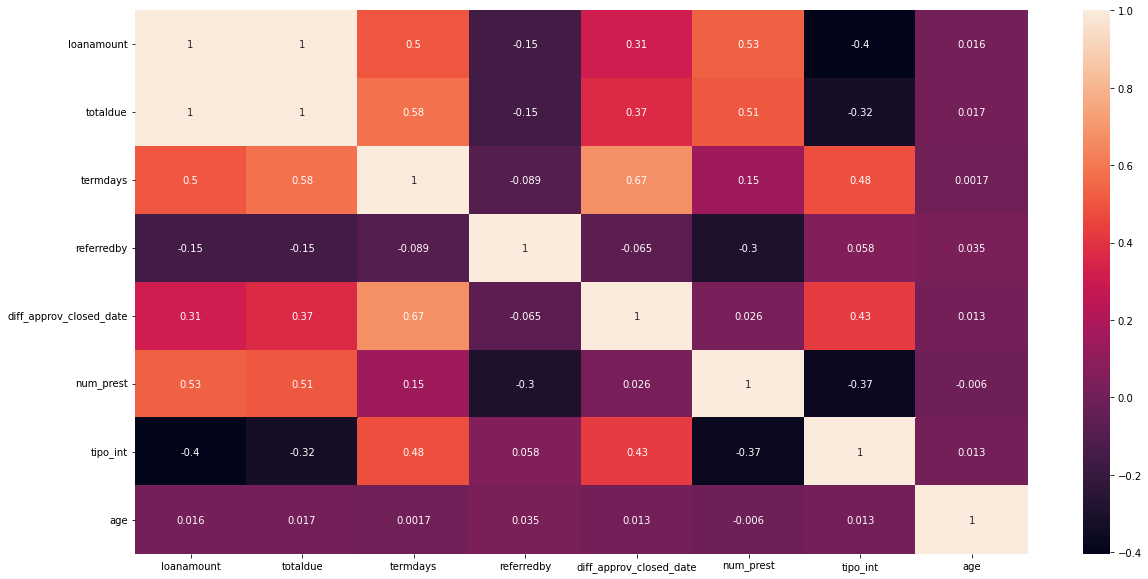

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(prev_dem.corr(),annot = True)
plt.show()

In [ ]:
#---- Hay correlacion 1 entre totaldue y loanamount. Eliminamos loanamount
prev_dem.drop(["loanamount"], axis=1, inplace =True)

In [ ]:
#Export CSV
"""
from google.colab import files

prev_dem.to_csv('prev_dem.csv', encoding = 'utf-8-sig') 
files.download('prev_dem.csv')
"""

"\nfrom google.colab import files\n\nprev_dem.to_csv('prev_dem.csv', encoding = 'utf-8-sig') \nfiles.download('prev_dem.csv')\n"

In [ ]:
prev_dem

,totaldue,termdays,referredby,diff_approv_closed_date,Good_bad_flag,num_prest,tipo_int,bank_account_type,bank_name_clients,Country,age
0,13000.0,30,0,16,Good,11,0.300,Other,Diamond Bank,Nigeria,46
1,13000.0,30,0,29,Good,11,0.300,Other,Diamond Bank,Nigeria,46
2,23800.0,30,0,52,Bad,11,0.190,Other,Diamond Bank,Nigeria,46
3,24500.0,30,0,24,Good,11,0.225,Other,Diamond Bank,Nigeria,46
4,24500.0,30,0,26,Good,11,0.225,Other,Diamond Bank,Nigeria,46
...,...,...,...,...,...,...,...,...,...,...,...
13688,11500.0,15,0,2,Good,1,0.150,Savings,UBA,Nigeria,32
13689,13000.0,30,1,27,Good,1,0.300,Savings,FCMB,Nigeria,39
13690,11500.0,15,0,9,Good,1,0.150,Savings,Zenith Bank,Nigeria,29
13691,11500.0,15,0,6,Good,1,0.150,Savings,Access Bank,Nigeria,38


### *test_demograficos*

### *test_previous_loan*

## 02_Clustering

## 03_Modelos

### Regresión Logística

#### Data Preparation

In [ ]:
# Cambio de nombre porque el código es copiado
data =prev_dem

In [ ]:
#TARGET VARIABLE
tgt='Good_bad_flag'

In [ ]:
#LIST OF CATEGORICAL VARIABLES WITH TWO POSSIBLE VALUES

varlist0 = ['Good_bad_flag']

varlist =  ['referredby', 'Good_bad_flag']


#LIST OF CATEGORICAL VARIABLES WITH MORE THAN TWO POSSIBLE VALUES

varlist2 = ['bank_account_type', 'bank_name_clients', 'Country']

#LIST OF CONTINUOUS VARIABLES

varlist3=['totaldue','termdays','diff_approv_closed_date','num_prest','tipo_int','age']

# Defining the map function
def binary_map(x):
    return x.map({'Good': 1, 'Bad': 0})

# Applying the function to the housing list
data[varlist0] = data[varlist0].apply(binary_map)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[varlist2], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

# We have created dummies for the below variables, so we can drop them
data = data.drop(varlist2, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
data

,totaldue,termdays,referredby,diff_approv_closed_date,Good_bad_flag,num_prest,tipo_int,age,bank_account_type_Other,bank_account_type_Savings,...,Country_Côte d’Ivoire,Country_Ghana,Country_Niger,Country_Nigeria,Country_United Kingdom,Country_United States,Country_Россия,Country_الإمارات العربية المتحدة,Country_ประเทศไทย,Country_中国
0,13000.0,30,0,16,1,11,0.300,46,1,0,...,0,0,0,1,0,0,0,0,0,0
1,13000.0,30,0,29,1,11,0.300,46,1,0,...,0,0,0,1,0,0,0,0,0,0
2,23800.0,30,0,52,0,11,0.190,46,1,0,...,0,0,0,1,0,0,0,0,0,0
3,24500.0,30,0,24,1,11,0.225,46,1,0,...,0,0,0,1,0,0,0,0,0,0
4,24500.0,30,0,26,1,11,0.225,46,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,11500.0,15,0,2,1,1,0.150,32,0,1,...,0,0,0,1,0,0,0,0,0,0
13689,13000.0,30,1,27,1,1,0.300,39,0,1,...,0,0,0,1,0,0,0,0,0,0
13690,11500.0,15,0,9,1,1,0.150,29,0,1,...,0,0,0,1,0,0,0,0,0,0
13691,11500.0,15,0,6,1,1,0.150,38,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Putting feature variable to X
X = data.drop([tgt], axis=1)

# Putting response variable to y
y = data[tgt]

#Normalizing continous variables
scaler = StandardScaler()
X[varlist3]=scaler.fit_transform(X[varlist3])

#Checking the target variable rate
print(f'The {tgt} rate is {round((sum(data[tgt])/len(data[tgt].index))*100,2)}%')

The Good_bad_flag rate is 80.24%


#### Correlations

If the correlation is high between two dummy variables, we can remove one of them because the target variable can be explained with the other.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3624 missing from current font.
  font.set_text(s

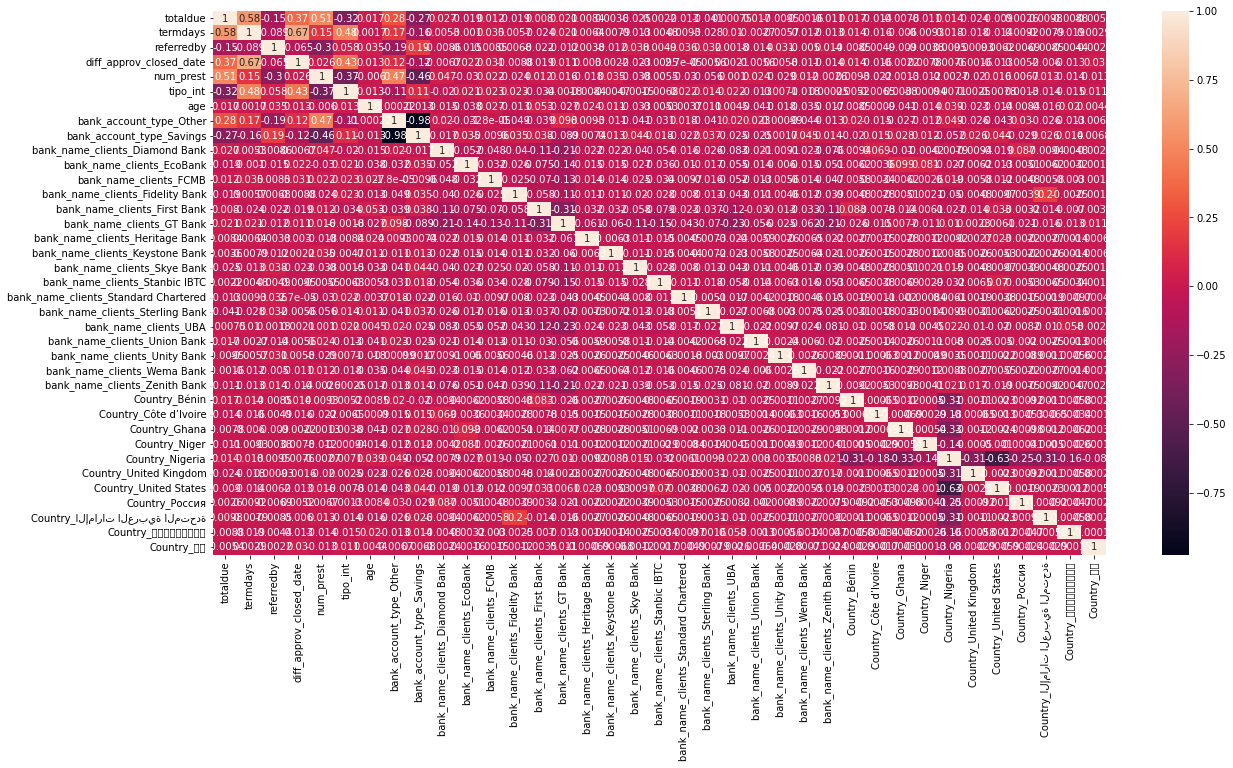

In [ ]:
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

In [ ]:
#MODIFY LIST

dummylist=['bank_account_type_Savings']

# droping variables
X = X.drop(dummylist, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Building the model

In [ ]:
X

,totaldue,termdays,referredby,diff_approv_closed_date,num_prest,tipo_int,age,bank_account_type_Other,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,...,Country_Côte d’Ivoire,Country_Ghana,Country_Niger,Country_Nigeria,Country_United Kingdom,Country_United States,Country_Россия,Country_الإمارات العربية المتحدة,Country_ประเทศไทย,Country_中国
0,-0.627452,0.335645,0,-0.616959,0.932453,1.296604,1.971640,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.627452,0.335645,0,0.549548,0.932453,1.296604,1.971640,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.444539,0.335645,0,2.613367,0.932453,-0.198638,1.971640,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0.514020,0.335645,0,0.100891,0.932453,0.277121,1.971640,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.514020,0.335645,0,0.280354,0.932453,0.277121,1.971640,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,-0.776339,-1.093792,0,-1.873197,-1.528921,-0.742363,-0.306827,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13689,-0.627452,0.335645,1,0.370085,-1.528921,1.296604,0.832407,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13690,-0.776339,-1.093792,0,-1.245078,-1.528921,-0.742363,-0.795070,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13691,-0.776339,-1.093792,0,-1.514272,-1.528921,-0.742363,0.669659,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#####HACK!!! **PRESTAR SOLO A DIFF_APROV_CLOSED_DATE < 15 DIAS**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


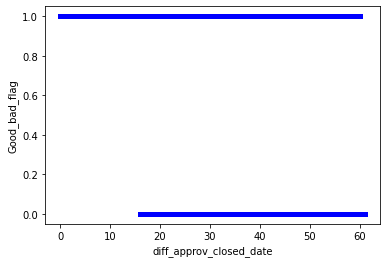

In [ ]:
X = X.drop(['diff_approv_closed_date'],1)

import matplotlib.pyplot as plt

plt.scatter(data['diff_approv_closed_date'], data['Good_bad_flag'], s=10, c='b', marker="s")
plt.xlabel('diff_approv_closed_date')
plt.ylabel('Good_bad_flag')

plt.show()

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y,(sm.add_constant(X)), family = sm.families.Binomial())
print(logm1.fit().summary())
print('\nIf there are variables with P>|z| greater than 0.05, we should remove them.')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                 Generalized Linear Model Regression Results                  
Dep. Variable:          Good_bad_flag   No. Observations:                13347
Model:                            GLM   Df Residuals:                    13311
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6474.7
Date:                Wed, 04 May 2022   Deviance:                       12949.
Time:                        09:05:34   Pearson chi2:                 1.32e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
# Variables con p < 0.05
col = ['totaldue','termdays','referredby','num_prest','tipo_int','age','bank_account_type_Other']

X = X[col]
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Good_bad_flag   No. Observations:                13347
Model:                            GLM   Df Residuals:                    13339
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6494.8
Date:                Wed, 04 May 2022   Deviance:                       12990.
Time:                        09:06:07   Pearson chi2:                 1.32e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.5413      0.032     48.348      0.000       1.479       1.604
totaldue                   -0.4082      0.063     -6.522      0.000      -0.531      -0.286
termdays                    0.7414      0.079      9.336      0.000       0.586       0.897
referredby                  0.3217      0.097      3.308      0.001       0.131       0.512
num_prest                   0.2307      0.030      7.601      0.000       0.171       0.290
tipo_int                   -0.5356      0.061     -8.850      0.000      -0.654      -0.417
age                         0.0577      0.022      2.602      0.009       0.014       0.101
bank_account_type_Other    -0.2851      0.053     -5.425      0.000      -0.388      -0.182
===========================================================================================
"""

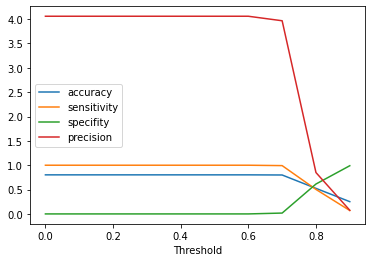

In [ ]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({tgt:y.values, tgt+'_Prob':y_train_pred})

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final[tgt+'_Prob'].map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Threshold','accuracy','sensitivity','specifity','precision'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final[tgt], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    precision = cm1[1,1]/(cm1[1,0]+cm1[0,1])
    specifity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specifity,precision]

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Threshold', y=['accuracy','sensitivity','specifity','precision'])
plt.show()

In [ ]:
# MODIFY. Select threshold

threshold = 0.3

In [ ]:
# Predicting the Target probability at threshold cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Good_bad_flag.map( lambda x: 1 if x > threshold else 0)
y_train_pred_final.drop(num,axis=1).head()

,Good_bad_flag,Good_bad_flag_Prob,final_predicted
0,1,0.801478,0
1,1,0.801478,0
2,0,0.853067,0
3,1,0.813919,0
4,1,0.813919,0


In [ ]:
# Confusion matrix for the final model
print('============================================')
confusion2 = confusion_matrix(y_train_pred_final[tgt], y_train_pred_final.final_predicted )
print(f'Confusion Matrix for Threshold = {threshold}')
print(confusion2)
print('============================================')

# Let's check the overall accuracy.
accuracy = round(accuracy_score(y_train_pred_final[tgt], y_train_pred_final.final_predicted),2)
print(f'Accuracy : {accuracy}')

# Assigning values
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# The sensitivity of our logistic regression model
sensitivity = round(TP/float(TP+FN),2)
print(f'Sensitivity : {sensitivity}')

# Let us calculate specifity
specifity = round(TN/float(TN+FP),2)
print(f'Specifity : {specifity}')

# Let us calculate precision
precision = round(TP/float(TP+FP),2)
print(f'Precision : {precision}')

Confusion Matrix for Threshold = 19
[[ 2638     0]
 [10709     0]]
Accuracy : 0.2
Sensitivity : 0.0
Specifity : 1.0
Precision : nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


El modelo funciona fatal